### import the necessery libraries

In [1]:
import pandas as pd
import glob
from numpy import NAN

### merging 12 month of sales data into one file

In [2]:
csv_files = glob.glob('Sales_Data\*.csv')

merged_files = pd.DataFrame()
for file in csv_files:
    df = pd.read_csv(file)
    merged_files = merged_files.append(df,ignore_index=True)

# merged_files.to_csv('merged_data/merged_files.csv',index=False)

C:\Users\Rasool\AppData\Local\Temp\ipykernel_14936\3625739774.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_files = merged_files.append(df,ignore_index=True)
C:\Users\Rasool\AppData\Local\Temp\ipykernel_14936\3625739774.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_files = merged_files.append(df,ignore_index=True)
C:\Users\Rasool\AppData\Local\Temp\ipykernel_14936\3625739774.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_files = merged_files.append(df,ignore_index=True)
C:\Users\Rasool\AppData\Local\Temp\ipykernel_14936\3625739774.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_files = me

## Read in update datframe

In [3]:
merged_files = pd.read_csv('merged_data/merged_files.csv')
merged_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Adding some additionak collomns

#### Removing the nan

In [4]:
new_files = merged_files.dropna()
new_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Adding the month collomn

In [5]:
new_files['month'] = new_files['Order Date'].str[0:2]
new_files.head()

C:\Users\Rasool\AppData\Local\Temp\ipykernel_14936\2441720258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_files['month'] = new_files['Order Date'].str[0:2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#####  Deleting the mistaken datas

In [6]:
temp_df =  new_files[new_files['month'].str[0:2] == 'Or']
index_df = temp_df.index
temp_df = new_files.drop(index_df)
temp_df[temp_df['month'].str[0:2] == 'Or']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month


### convertung the dtype of the month collomn to integer

In [7]:
temp_df['month'] = temp_df['month'].astype('int32')
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Adding tha sale collomn

##### sale = Quantity Orderd * Price Each

In [8]:
from time import time


In [9]:
# temp_df['Price Each'] = temp_df['Price Each'].astype('float32')
t = time() 
temp_df['Price Each'] = pd.to_numeric(temp_df['Price Each'])
# temp_df['Quantity Ordered'] = temp_df['Quantity Ordered'].astype('int64')
temp_df['Quantity Ordered'] = pd.to_numeric(temp_df['Quantity Ordered'])
print(time()-t)

0.15729355812072754


In [10]:
# t = time()
# temp_df['Price Each'] = temp_df['Price Each'].astype('float32')
# temp_df['Quantity Ordered'] = temp_df['Quantity Ordered'].astype('int64')
# print(time()-t)


In [11]:
temp_df['Sales'] = temp_df['Quantity Ordered'] * temp_df['Price Each']
temp_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [12]:
result = temp_df.groupby('month').sum()


C:\Users\Rasool\AppData\Local\Temp\ipykernel_14936\2710509073.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = temp_df.groupby('month').sum()


In [13]:
import matplotlib.pyplot as plt 

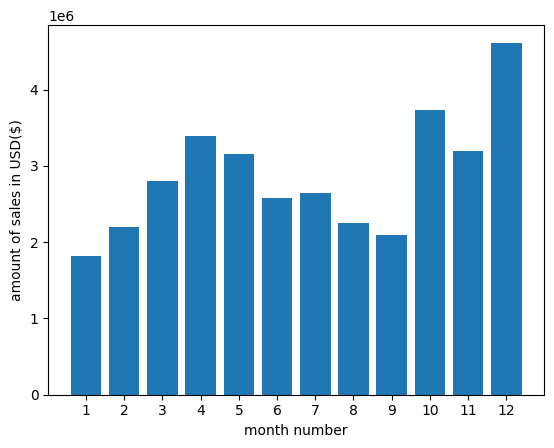

In [14]:
month = range(1,13)
plt.bar(month, result['Sales'])
plt.xticks(month)
plt.xlabel('month number')
plt.ylabel('amount of sales in USD($)')
plt.show()

### task2:findin the best sailing city

In [15]:
temp_df =temp_df.dropna()
temp_df.reset_index(drop=True, inplace=True)


In [16]:
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [17]:
def get_city(addres):
    return(addres.split(',')[1]) 

def get_state(addres):
    return (addres.split(',')[2][1:3])

temp_df['City'] = temp_df['Purchase Address'].apply(lambda x : get_city(x)+ ' (' + get_state(x)+ ')')
# temp_df['State'] = temp_df['Purchase Address'].apply(lambda x : x.split(',')[2][1:3])
temp_df 



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [18]:
result = temp_df.groupby('City').sum()
result

C:\Users\Rasool\AppData\Local\Temp\ipykernel_14936\3877170672.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = temp_df.groupby('City').sum()


,Quantity Ordered,Price Each,month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


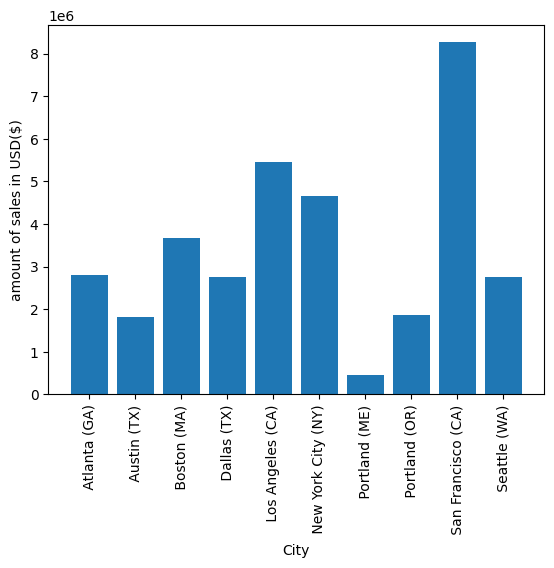

In [19]:
city_number = range(1,11)
plt.bar(result.index, result['Sales'])
plt.xticks(result.index, rotation='vertical')
plt.xlabel('City')
plt.ylabel('amount of sales in USD($)')
plt.autoscale()
plt.show()


### task3 : best time to advertisment

In [20]:
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [21]:
temp_df['Order Date'] = pd.to_datetime(temp_df['Order Date'])
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [22]:
temp_df['Hour'] = temp_df['Order Date'].apply(lambda x :x.hour)
# temp_df['Order Date'][1].hour

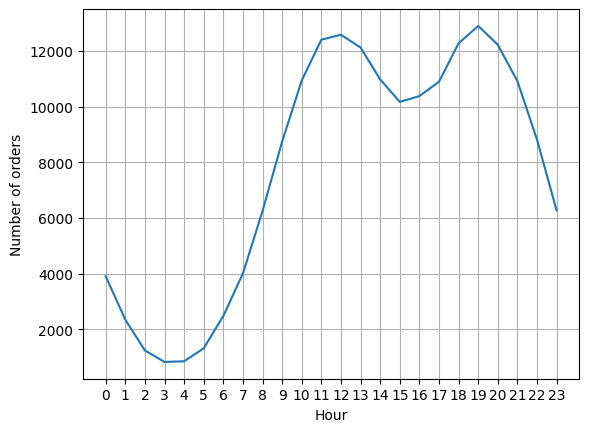

In [23]:
T = range(25)
time_result=temp_df.groupby('Hour').count()
plt.plot(time_result.index, time_result['Sales'])
plt.xticks(time_result.index)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.show()

# my recommendation is around 12 pm or 19 pm !

In [24]:
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17


### task4 : what product are often sold togheter?

### Adding the minute column

In [25]:
temp_df['Minute'] = temp_df['Order Date'].dt.minute
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [26]:

temp_df['Order ID'] = pd.to_numeric(temp_df['Order ID'])
temp_df
temp_df[temp_df['Order ID'] == 176560]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38


In [35]:
df = temp_df[temp_df['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
...,...,...,...,...,...,...,...,...,...,...,...
185893,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18
185904,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25
185905,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25
185941,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49


In [36]:
df['Group'] = df.groupby('Order ID')['Product'].transform(lambda x :','.join(x))
df = df[['Order ID', 'Group']].drop_duplicates()
df

C:\Users\Rasool\AppData\Local\Temp\ipykernel_14936\2214227151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = df.groupby('Order ID')['Product'].transform(lambda x :','.join(x))


,Order ID,Group
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
185882,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
185884,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
185892,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185904,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [42]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

#### what product sales the most and what do you think the resone is?

In [43]:
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


C:\Users\Rasool\AppData\Local\Temp\ipykernel_14936\1245386038.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_product = temp_df.groupby('Product').sum()


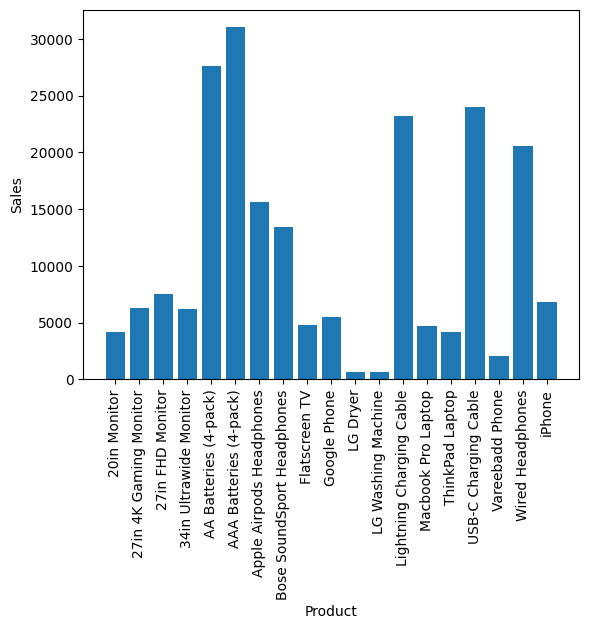

In [49]:
result_product = temp_df.groupby('Product').sum()
plt.bar(result_product.index,result_product['Quantity Ordered'])
plt.xticks(result_product.index,rotation ='vertical')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()

C:\Users\Rasool\AppData\Local\Temp\ipykernel_14936\3861473562.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price = temp_df.groupby('Product').mean()['Price Each']


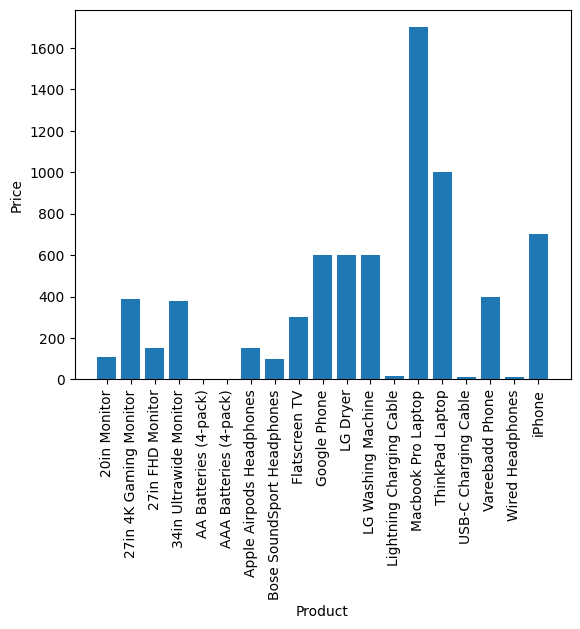

In [53]:
price = temp_df.groupby('Product').mean()['Price Each']
plt.bar(price.index, price)
plt.xticks(price.index, rotation= 'vertical')
plt.xlabel('Product')
plt.ylabel('Price')
plt.show()